In [127]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [3]:
brooklyn = df[df['BOROUGH'] == 'BROOKLYN']
aadt_brooklyn = brooklyn['Counts'].sum()
aadt_brooklyn

102182905.74916796

In [4]:
manhattan = df[df['BOROUGH'] == 'MANHATTAN']
aadt_manhattan = manhattan['Counts'].sum()
aadt_manhattan

90975947.97742422

In [5]:
queens = df[df['BOROUGH'] == 'QUEENS']
aadt_queens = queens['Counts'].sum()
aadt_queens

46196500.539221436

In [6]:
bronx = df[df['BOROUGH'] == 'BRONX']
aadt_bronx = bronx['Counts'].sum()
aadt_bronx

19075411.036620777

In [7]:
staten = df[df['BOROUGH'] == 'STATEN ISLAND']
aadt_staten = staten['Counts'].sum()
aadt_staten

2009933.0137327763

In [223]:
aadt = np.array([aadt_brooklyn, aadt_manhattan, aadt_queens, aadt_bronx, aadt_staten])
aadt = (aadt)/1000000
aadt

array([ 102.18290575,   90.97594798,   46.19650054,   19.07541104,
          2.00993301])

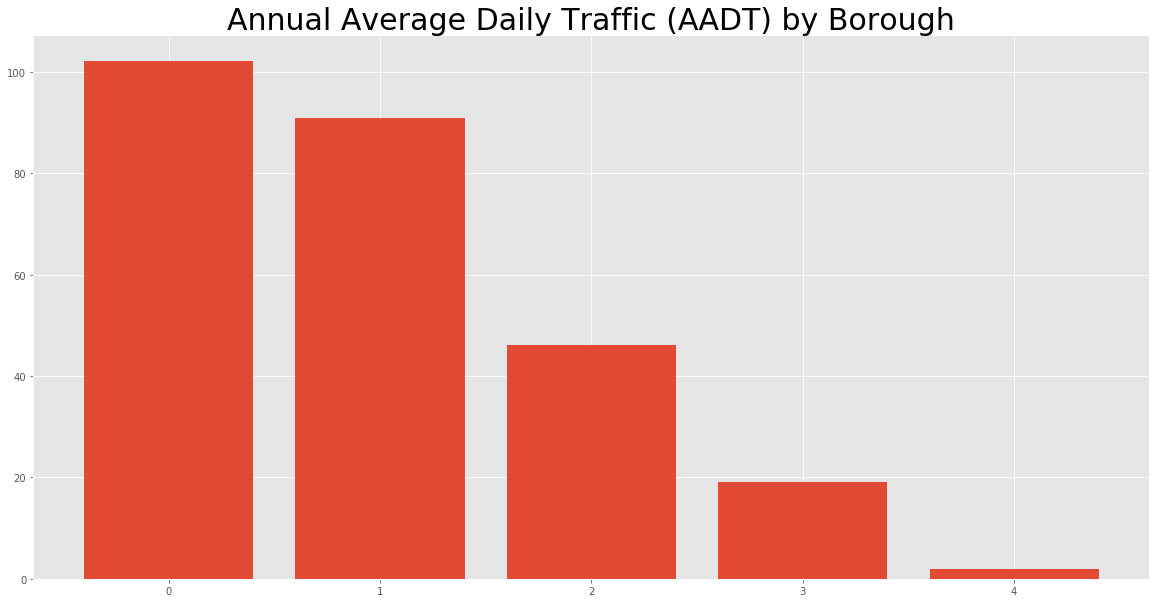

In [9]:
plt.bar(range(len(aadt)),aadt)
plt.title('Annual Average Daily Traffic (AADT) by Borough', fontsize=30)

In [10]:
collByBorough = pd.DataFrame(df['BOROUGH'])
collByBorough.apply(pd.value_counts)

,BOROUGH
BROOKLYN,8078
MANHATTAN,7318
QUEENS,3876
BRONX,1719
STATEN ISLAND,194


In [11]:
len(manhattan)

7318

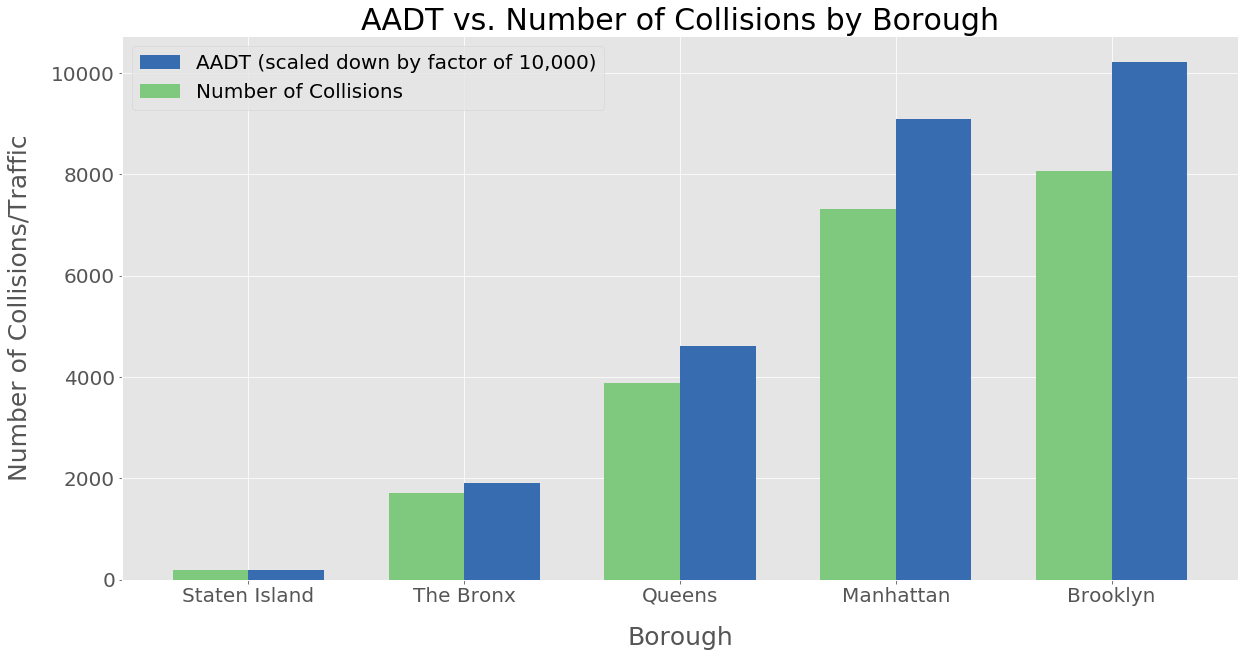

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o

import numpy as np

dpoints = np.array([['Number of Collisions', 'Brooklyn', len(brooklyn)],['Number of Collisions', 'Manhattan', len(manhattan)],
                    ['Number of Collisions', 'Queens', len(queens)],['Number of Collisions', 'The Bronx', len(bronx)],
                    ['Number of Collisions', 'Staten Island', len(staten)],
                    ['AADT (scaled down by factor of 10,000)', 'Brooklyn', aadt_brooklyn/10000],
                    ['AADT (scaled down by factor of 10,000)', 'Manhattan', aadt_manhattan/10000],
                    ['AADT (scaled down by factor of 10,000)', 'Queens', aadt_queens/10000],
                    ['AADT (scaled down by factor of 10,000)', 'The Bronx', aadt_bronx/10000],
                    ['AADT (scaled down by factor of 10,000)', 'Staten Island', aadt_staten/10000]])

fig = plt.figure()
ax1 = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.

    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''

    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]

    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]

    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

    # the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))

    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=cond, 
               color=cm.Accent(float(i) / n), align='edge')

    # Set the x-axis tick labels to be equal to the categories
    ax1.set_xticks(indeces)
    ax1.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=0)

    # Add the axis labels
    ax.set_ylabel("Number of Collisions/Traffic", fontsize=25, labelpad=20)
    ax1.set_xlabel("Borough", fontsize=25, labelpad=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], loc='upper left', fontsize=20)
    
    plt.title('AADT vs. Number of Collisions by Borough', fontsize=30)
    
    #ax2 = ax1.twinx()
    #ax2.set_yticks([100,80,60,40,20,0])
    #for tl in ax2.get_yticklabels():
    #    tl.set_color('b')

barplot(ax1, dpoints)
plt.show()

In [15]:
coll = np.array([len(brooklyn),len(manhattan),len(queens),len(bronx),len(staten)])
print(coll)
print(aadt)

[8078 7318 3876 1719  194]
[ 102.18290575   90.97594798   46.19650054   19.07541104    2.00993301]


In [27]:
plt.text?

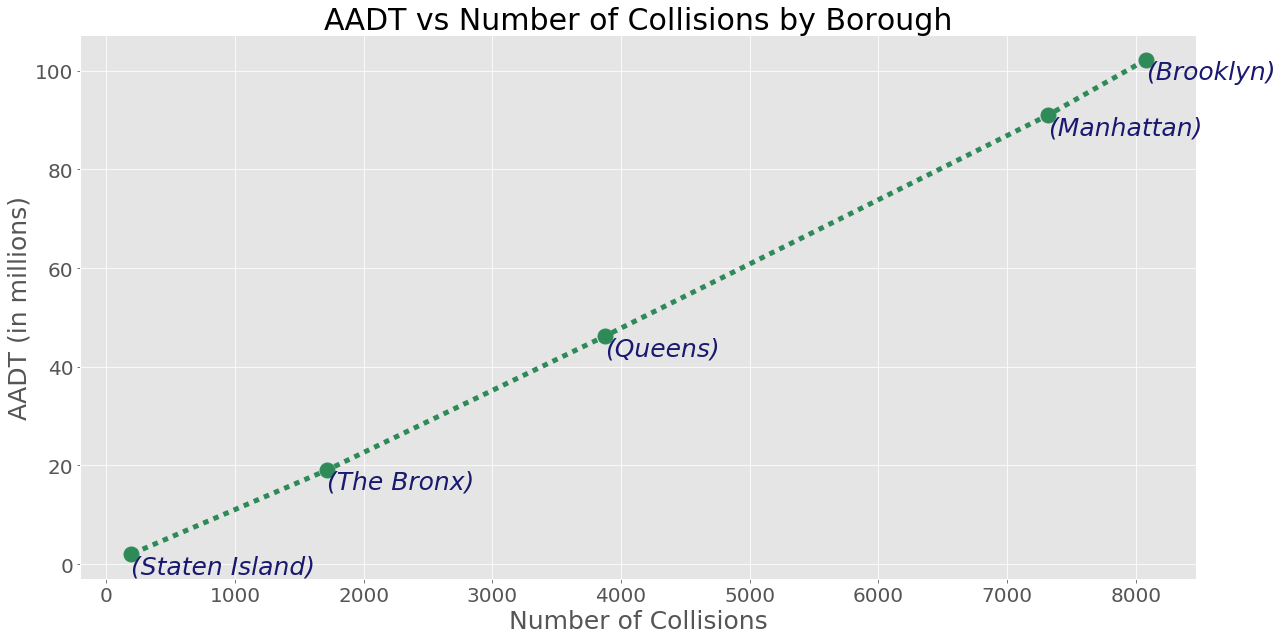

In [257]:
labels = ['(Brooklyn)','(Manhattan)','(Queens)','(The Bronx)','(Staten Island)']

plt.plot(coll, aadt, 'o-', c='seagreen', linewidth=5, linestyle='dotted', markersize=15)
for i in range(len(labels)):
    plt.text(coll[i], aadt[i], labels[i], horizontalalignment='left', 
             verticalalignment='top', fontsize=25, color='midnightblue', rotation=0, style='oblique')
plt.title('AADT vs Number of Collisions by Borough', fontsize=30)
plt.xlabel('Number of Collisions', fontsize=25)
plt.ylabel('AADT (in millions)', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [304]:
avg_cr = df['Collision Rate'].quantile(0.75)
avg_cr

0.3877885389097325

In [305]:
brooklyn_danger = len(brooklyn[brooklyn['Collision Rate'] >= avg_cr])
brooklyn_danger

1887

In [306]:
manhattan_danger = len(manhattan[manhattan['Collision Rate'] >= avg_cr])
manhattan_danger

2645

In [307]:
queens_danger = len(queens[queens['Collision Rate'] >= avg_cr])
queens_danger

510

In [308]:
bronx_danger = len(bronx[bronx['Collision Rate'] >= avg_cr])
bronx_danger

246

In [309]:
staten_danger = len(staten[staten['Collision Rate'] >= avg_cr])
staten_danger

17

In [310]:
danger_areas = np.array([brooklyn_danger,manhattan_danger,queens_danger,bronx_danger,staten_danger])
#aadt = np.array([aadt_manhattan, aadt_brooklyn, aadt_queens, aadt_bronx, aadt_staten])
#aadt = (aadt)/1000000
#aadt

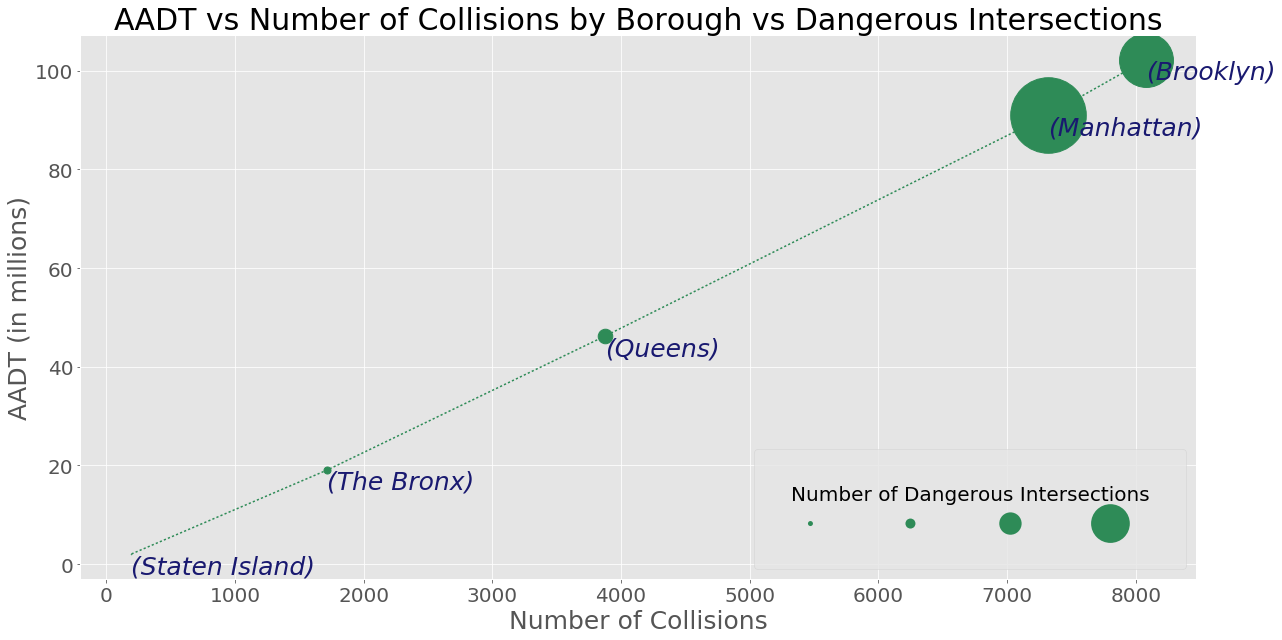

In [312]:
#plt.plot(coll, aadt, 'o-', c='seagreen', linewidth=5, markersize=danger_areas)
for i in range(0, len(labels)):
    plt.plot(coll[i], aadt[i], 'o-', c='seagreen', linewidth=5, markersize=danger_areas[i]/35)
    plt.text(coll[i], aadt[i], labels[i], horizontalalignment='left', 
             verticalalignment='top', fontsize=25, color='midnightblue', rotation=0, style='oblique')
plt.plot(coll, aadt, linestyle="dotted", color="seagreen")
plt.title('AADT vs Number of Collisions by Borough vs Dangerous Intersections', fontsize=30)
plt.xlabel('Number of Collisions', fontsize=25)
plt.ylabel('AADT (in millions)', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

l1 = plt.scatter([],[], s=25, edgecolors='none', color='seagreen')
l2 = plt.scatter([],[], s=100, edgecolors='none', color='seagreen')
l3 = plt.scatter([],[], s=500, edgecolors='none', color='seagreen')
l4 = plt.scatter([],[], s=1500, edgecolors='none', color='seagreen')

label = ["", "", "", ""]

leg = plt.legend([l1, l2, l3, l4], label, ncol=4, frameon=True, fontsize=20,
handlelength=2, loc = 'lower right', borderpad = 1.8,
handletextpad=1, title='Number of Dangerous Intersections', scatterpoints = 1)
leg.get_title().set_fontsize('20')

plt.show()

In [313]:
max_rates = np.array([brooklyn['Collision Rate'].max(),manhattan['Collision Rate'].max(),
                      queens['Collision Rate'].max(),bronx['Collision Rate'].max(),
                     staten['Collision Rate'].max()])
max_rates

array([ 18.92901619,   4.26416502,   4.17217162,   2.66640003,   1.58365666])